In [70]:
%matplotlib inline
from modsim import *

earth = Condition(thickness = 2414,
                     surface_area = 5.099686589e+14,
                     density = 5510)


earth.radius = sqrt(earth.surface_area / (8 * np.pi))
earth.volume1 = earth.thickness * earth.radius** 2 * np.pi
earth.mass = earth.volume1 * earth.density



baseball = Condition(x = 0, 
                      y = (earth.thickness/2) + 1,
                      ay = 9.8,
                      G = 6.67e-11,
                      mass = 145e-3,
                      diameter = 73e-3,
                      rho = 1.2,
                      C_d = 0.3,
                      angle = 45,
                      velocity = 40,
                      duration = 25.1)

def make_system(condition):
    """Make a system object.
    
    condition: Condition object with angle, velocity, x, y,
               diameter, duration, g, mass, rho, and C_d
               
    returns: System object
    """
    unpack(condition)
    
    # convert angle to degrees
    theta = np.deg2rad(angle)
    
    # compute x and y components of velocity
    vx, vy = pol2cart(theta, velocity)
    
    # make the initial state
    init = State(x=x, y=y, vx=vx, vy=vy)
    
    # compute area from diameter
    area = np.pi * (diameter/2)**2
    
    # compute timestamps
    ts = linspace(0, duration, 101)
    
    return System(init=init, G=G, mass=mass, 
                  area=area, rho=rho, C_d=C_d, ts=ts)

def slope_func(state, t, system):
    x, y, vx, vy = state
    unpack(system)
    p = Vector(x, y)
    v = Vector(vx, vy)
    f_grav = (-G * earth.mass * mass * p.hat()/ (p.mag**1))
    f_drag = -rho * v.mag * v * C_d * area / 2
    
    a_grav = f_grav / mass
    a_drag = f_drag / mass
    
    a_y= Vector(0, -ay)
    
    print("a_grav",f_grav)
    print("a_drag",a_drag)
    print("a_y",a_y)
    
    a = a_grav + a_drag + a_y
    
    return vx, vy, a.x, a.y
    


    

a_grav [      -0.         -6788428.77991322] dimensionless
a_drag [-5.87820989 -5.87820989] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [      -0.         -6788428.77991322] dimensionless
a_drag [-5.87820989 -5.87820989] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [      -0.         -6788428.77991322] dimensionless
a_drag [-5.87820989 -5.87820989] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [ -1.21364301e-05  -6.78842878e+06] dimensionless
a_drag [-5.87783844 -5.87709556] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [ -2.42728602e-05  -6.78842878e+06] dimensionless
a_drag [-5.87746701 -5.87598135] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [ -6.93938262e-02  -6.78842874e+06] dimensionless
a_drag [-4.31342252 -1.19631411] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [ -6.93938267e-02  -6.78842874e+06] dimensionless
a_drag [-4.31342247 -1.19631404] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [ -1.38763375e-01  -6.78842874e+06] dimensionless

a_y [ 0.  -9.8] dimensionless
a_grav [ -1.96212245e+04  -1.86128896e+08] dimensionless
a_drag [  5.70053274e+04   5.70703953e+08] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [ -1.96212257e+04  -1.86128910e+08] dimensionless
a_drag [  5.70054068e+04   5.70704661e+08] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [ -1.92257105e+04  -1.82561528e+08] dimensionless
a_drag [  5.63453973e+04   5.64408767e+08] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [ -1.92257110e+04  -1.82561534e+08] dimensionless
a_drag [  5.63454288e+04   5.64409049e+08] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [ -2.06459951e+04  -1.95348507e+08] dimensionless
a_drag [  5.86752385e+04   5.86614996e+08] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [ -2.06459952e+04  -1.95348508e+08] dimensionless
a_drag [  5.86752393e+04   5.86615001e+08] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [ -2.23249014e+04  -2.10382120e+08] dimensionless
a_drag [  6.12944799e+04   6.11517892e+08] dimens

a_grav [ -6.10370309e+07  -7.16720154e+10] dimensionless
a_drag [  6.48164173e+05   3.62361383e+09] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [ -6.92340401e+07  -7.68888542e+10] dimensionless
a_drag [  6.69924225e+05   3.66461023e+09] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [ -6.92340396e+07  -7.68888544e+10] dimensionless
a_drag [  6.69924610e+05   3.66461040e+09] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [ -6.74710314e+07  -7.57926286e+10] dimensionless
a_drag [  6.65387728e+05   3.65623001e+09] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [ -6.74710311e+07  -7.57926287e+10] dimensionless
a_drag [  6.65387903e+05   3.65623009e+09] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [ -7.50905404e+07  -8.04385817e+10] dimensionless
a_drag [  6.84492535e+05   3.69095414e+09] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [ -7.50905403e+07  -8.04385817e+10] dimensionless
a_drag [  6.84492560e+05   3.69095414e+09] dimensionless
a_y [ 0.  -9.8] dimens

a_grav [ -1.83969102e+12  -1.58763639e+13] dimensionless
a_drag [  3.84964015e+07   6.79619770e+09] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [ -1.79573248e+12  -1.56831736e+13] dimensionless
a_drag [  3.80564537e+07   6.78891363e+09] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [ -1.79573248e+12  -1.56831736e+13] dimensionless
a_drag [  3.80564631e+07   6.78891366e+09] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [ -1.98600207e+12  -1.65030227e+13] dimensionless
a_drag [  3.99232614e+07   6.81924434e+09] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [ -1.98600207e+12  -1.65030227e+13] dimensionless
a_drag [  3.99232621e+07   6.81924434e+09] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [ -2.20893207e+12  -1.74141965e+13] dimensionless
a_drag [  4.19978320e+07   6.85127897e+09] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [ -2.20893207e+12  -1.74141965e+13] dimensionless
a_drag [  4.19978460e+07   6.85127900e+09] dimensionless
a_y [ 0.  -9.8] dimens

a_grav [ -1.28477818e+12   2.49255434e+13] dimensionless
a_drag [  8.24324163e+08   7.00987922e+09] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [ -1.02810754e+12   2.37331548e+13] dimensionless
a_drag [  8.23322742e+08   6.98075852e+09] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [ -1.02810753e+12   2.37331548e+13] dimensionless
a_drag [  8.23322730e+08   6.98075853e+09] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [ -8.12100658e+11   2.26491464e+13] dimensionless
a_drag [  8.22254524e+08   6.95304355e+09] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [ -8.12100641e+11   2.26491464e+13] dimensionless
a_drag [  8.22254483e+08   6.95304357e+09] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [ -6.29233886e+11   2.16596144e+13] dimensionless
a_drag [  8.21135717e+08   6.92660775e+09] dimensionless
a_y [ 0.  -9.8] dimensionless
a_grav [ -6.29233876e+11   2.16596144e+13] dimensionless
a_drag [  8.21135687e+08   6.92660777e+09] dimensionless
a_y [ 0.  -9.8] dimens

C:\ProgramData\Miniconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


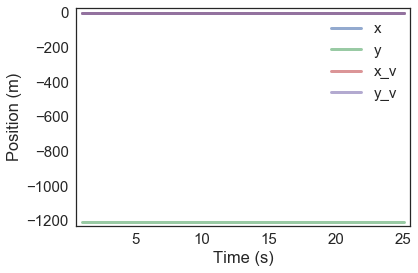

In [71]:
system = make_system(baseball)
slope_func(system.init, 0, system)

run_odeint(system, slope_func)

xs = system.results.x
ys = system.results.y - (earth.thickness/2) + 1

xv = system.results.vx
yv = system.results.vy

newfig()
plot(xs[1:], label='x')
plot(ys[1:], label='y')
plot(xv[1:], label='x_v')
plot(yv[1:], label='y_v')

decorate(xlabel='Time (s)',
         ylabel='Position (m)')


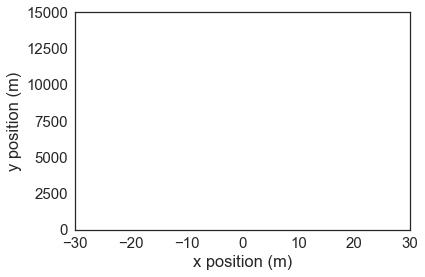

In [32]:
newfig()
decorate(xlabel='x position (m)',
         ylabel='y position (m)',
         xlim=[-30, 30],
         ylim=[-50, 15000],
         legend=False)

for x, y in zip(system.results.x, system.results.y):
    plot(x, y, 'bo', update=True)
    sleep(0.01)